## 1. Importing all the libraries 

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
%matplotlib inline
import pandas_profiling as pf

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

## 2. Loading the data
data is already persent in our local system (download from uci dataset)

In [3]:
df = pd.read_csv("zomato.csv")

In [4]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


##  Exploratory Data Analysis (EDA)

#####  Manually 

In [5]:
df.shape

(51717, 17)

In [6]:
df.dtypes     # checking the data types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In given info we observe that some null value in dataset

checking how many null values in each column`m

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### Droping the irrelevant Columns

* pop and del
* "pop" will return the deleted columns back
* "del" delete the column permanently
* drop (axis--0,1) 0- row and 1- col


In [9]:
del df["url"]
del df ["address"]
del df["phone"]
del df["reviews_list"]
del df["menu_item"]
# df.drop(["url"],axis=1, inplace= True)   # drop the col permanent

In [10]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


### Removing Duplicates value

In [11]:
df.duplicated().sum() 

108

In case duplicate generate due to remove of col ,
so we can drop the duplicate value 

In [12]:
df.drop_duplicates(inplace=True)

### Removing the null values

In [13]:
# checking the tolal no. of null values
df.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7755
votes                              0
location                          21
rest_type                        227
dish_liked                     28014
cuisines                          45
approx_cost(for two people)      344
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [14]:
df.shape
#df.shape[0]  no.of rows

(51609, 12)

In [15]:
# in percentage view for each col
(df.isna().sum()/df.shape[0])*100

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.026449
votes                           0.000000
location                        0.040691
rest_type                       0.439846
dish_liked                     54.281230
cuisines                        0.087194
approx_cost(for two people)     0.666550
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [16]:
# Remove the NAN values from the dataset
df.dropna(how = "any",inplace=True)
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [17]:
df.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [18]:
# [in case "votes"-- int64 we can change into int32 ] this help us to decrease size and space for better load of data
df["votes"] = df["votes"].astype("int32")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23364 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         23364 non-null  object
 1   online_order                 23364 non-null  object
 2   book_table                   23364 non-null  object
 3   rate                         23364 non-null  object
 4   votes                        23364 non-null  int32 
 5   location                     23364 non-null  object
 6   rest_type                    23364 non-null  object
 7   dish_liked                   23364 non-null  object
 8   cuisines                     23364 non-null  object
 9   approx_cost(for two people)  23364 non-null  object
 10  listed_in(type)              23364 non-null  object
 11  listed_in(city)              23364 non-null  object
dtypes: int32(1), object(11)
memory usage: 2.2+ MB


* Dish_liked column has 27751 null values almost half of total rows
* rate col has 7520 null values

In [20]:
df["rate"].isnull().sum()

0

### unique rating in rates columns

In [21]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In case it contain "NEW" ,  "/5"format and nan value

In [22]:
df = df.loc[df.rate != "NEW"]    # in case we can rid or remove the row "new"

In [23]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
# remove the "/5" from rate

#df["rate"] = df["rate"].apply(lambda x:x.replace('/5',''))
df['rate'] = df['rate'].apply(lambda x: str(x).replace('/5',''))

/home/arcgate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

######  This all process can be done when we not remove the null value before
* df[df['rate']=='-']["rate"]
* df["rate"].isnull().sum()
* df["rate"] = df["rate"].str.replace(" ","")
* df["rate"] = df["rate"].str.replace("-","NAN")
* df["rate"]
* df['rate']=df['rate'].fillna('NaN')  # fillna -> fill the null value --> "NAN"

In [26]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [27]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

##### As we see that "location" columns has more Sublocation and city columns have a better location so we drop 'location' columns

In [28]:
del df["location"]

In [29]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


## Renaming columns appropriately

In [30]:
df

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200",Pubs and bars,Whitefield
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000",Pubs and bars,Whitefield
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200",Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield


In [31]:
df.rename(columns={"approx_cost(for two people)":"cost",'listed_in(type)':'Meal_type',"listed_in(city)":"city"},inplace=True)

/home/arcgate/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'dish_liked', 'cuisines', 'cost', 'Meal_type', 'city'],
      dtype='object')

### Data Visualization

##### Most famous restaurants chain in Bangaluru top 25

In [33]:
top = df["name"].value_counts()[:25]

In [34]:
top.index

Index(['Onesta', 'Empire Restaurant', 'KFC', 'McDonald's', 'Pizza Hut',
       'Domino's Pizza', 'Faasos', 'Smally's Resto Cafe', 'Burger King',
       'Corner House Ice Cream', 'Polar Bear', 'Smoor', 'Mani's Dum Biryani',
       'Pizza Stop', 'Mainland China', 'Chung Wah', 'Subway', 'Hammered',
       'Lakeview Milkbar', 'eat.fit', 'Truffles', 'Beijing Bites',
       'Leon Grill', 'Petoo', 'Krispy Kreme'],
      dtype='object')

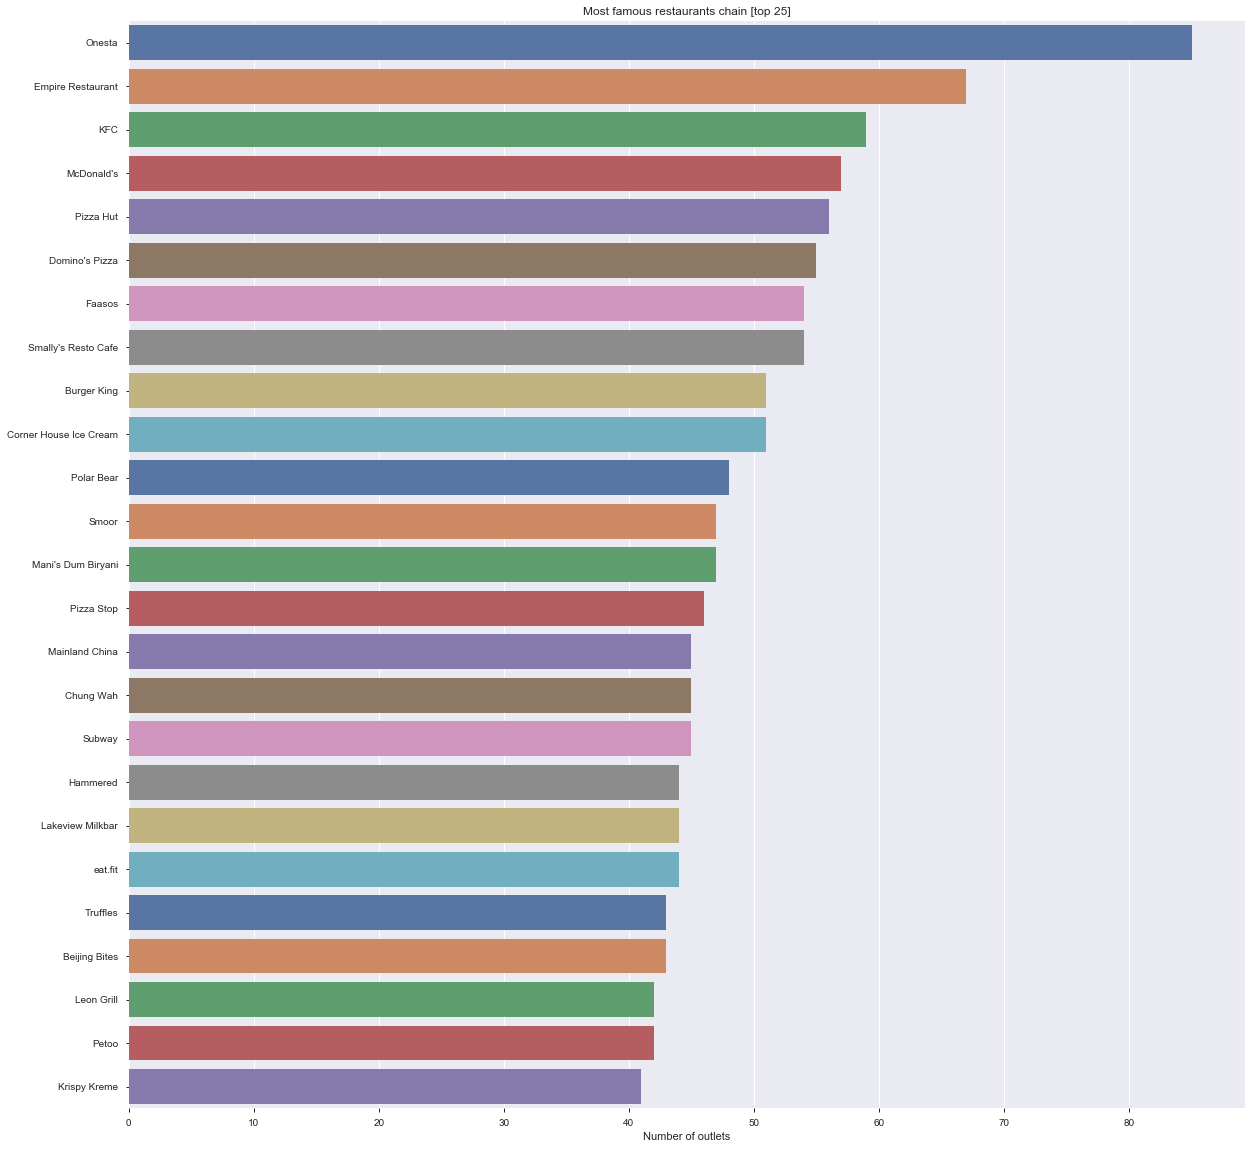

In [35]:
plt.figure(figsize=(20,20))
sns.barplot(x= top, y = top.index, palette="deep")
plt.title("Most famous restaurants chain [top 25]")
plt.xlabel("Number of outlets")
plt.show()

This graph show that this top brand has more than 40 outlet 

##### Number of restaurants that take online orders

Text(0.5, 0, 'Online_Orders')

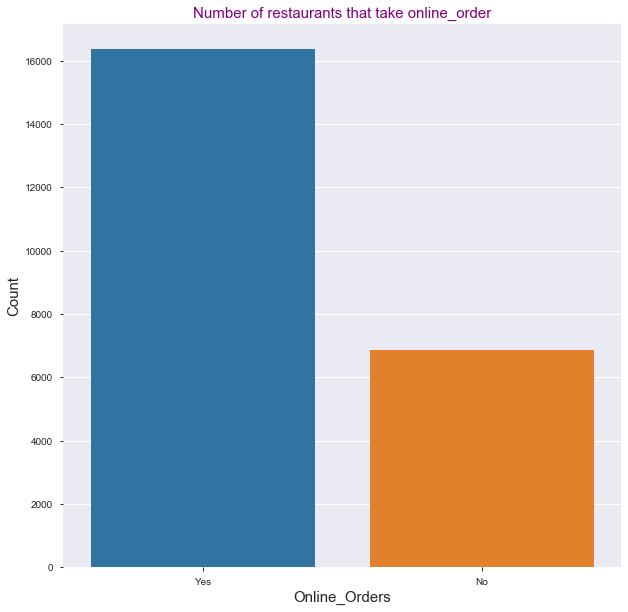

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(df["online_order"])
plt.title("Number of restaurants that take online_order",fontsize = 15,loc = 'center',color = "purple")
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Online_Orders", fontsize = 15)

##### Number of restaurants that have the option to book tabel

Text(0.5, 0, 'Booking_Tabel')

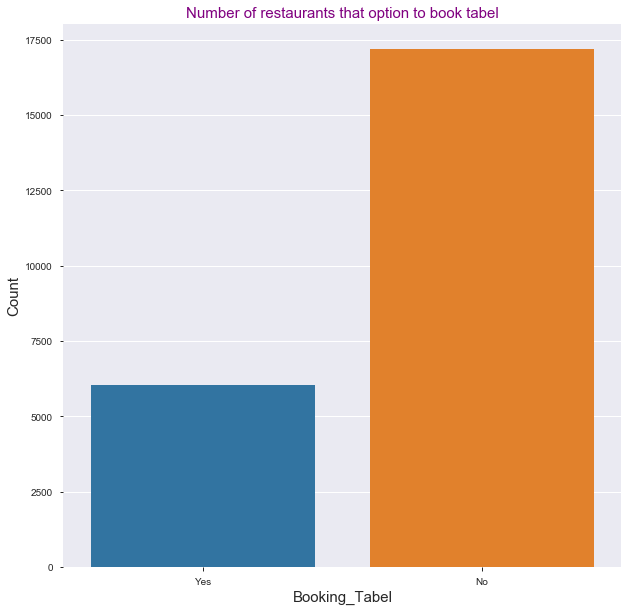

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(df["book_table"])
plt.title("Number of restaurants that option to book tabel",fontsize = 15,loc = 'center',color = "purple")
plt.ylabel("Count", fontsize = 15)
plt.xlabel("Booking_Tabel", fontsize = 15)

##### Number of restaurants with meal type

In [38]:
df

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,Meal_type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200",Pubs and bars,Whitefield
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000",Pubs and bars,Whitefield
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200",Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield


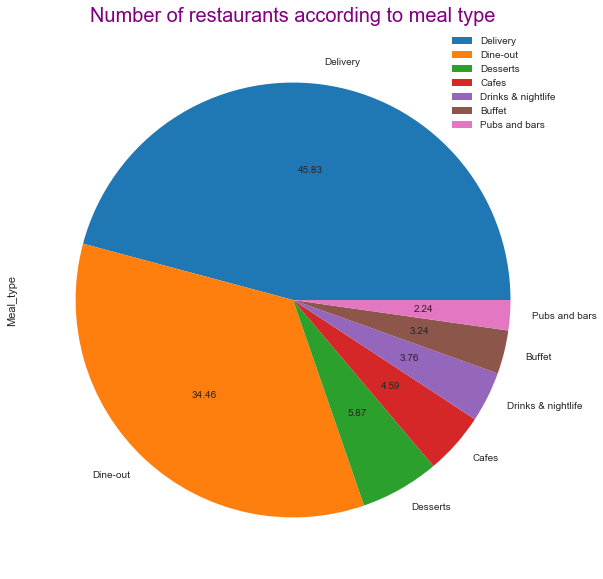

In [39]:
plt.figure(figsize = (10,10))
ax = df['Meal_type'].value_counts()
#labels = df["Meal_type"].value_counts().index
#plt.pie(ax,labels=labels, autopct = "%.2f")
ax.plot(kind="pie",autopct = "%.2f")
plt.title("Number of restaurants according to meal type", fontsize = 20, color = "purple")
plt.legend()
plt.show()

In [40]:
df["Meal_type"].value_counts()

Delivery              10641
Dine-out               8002
Desserts               1364
Cafes                  1066
Drinks & nightlife      872
Buffet                  752
Pubs and bars           521
Name: Meal_type, dtype: int64

##### No. of Restaurants in each area of the banglore

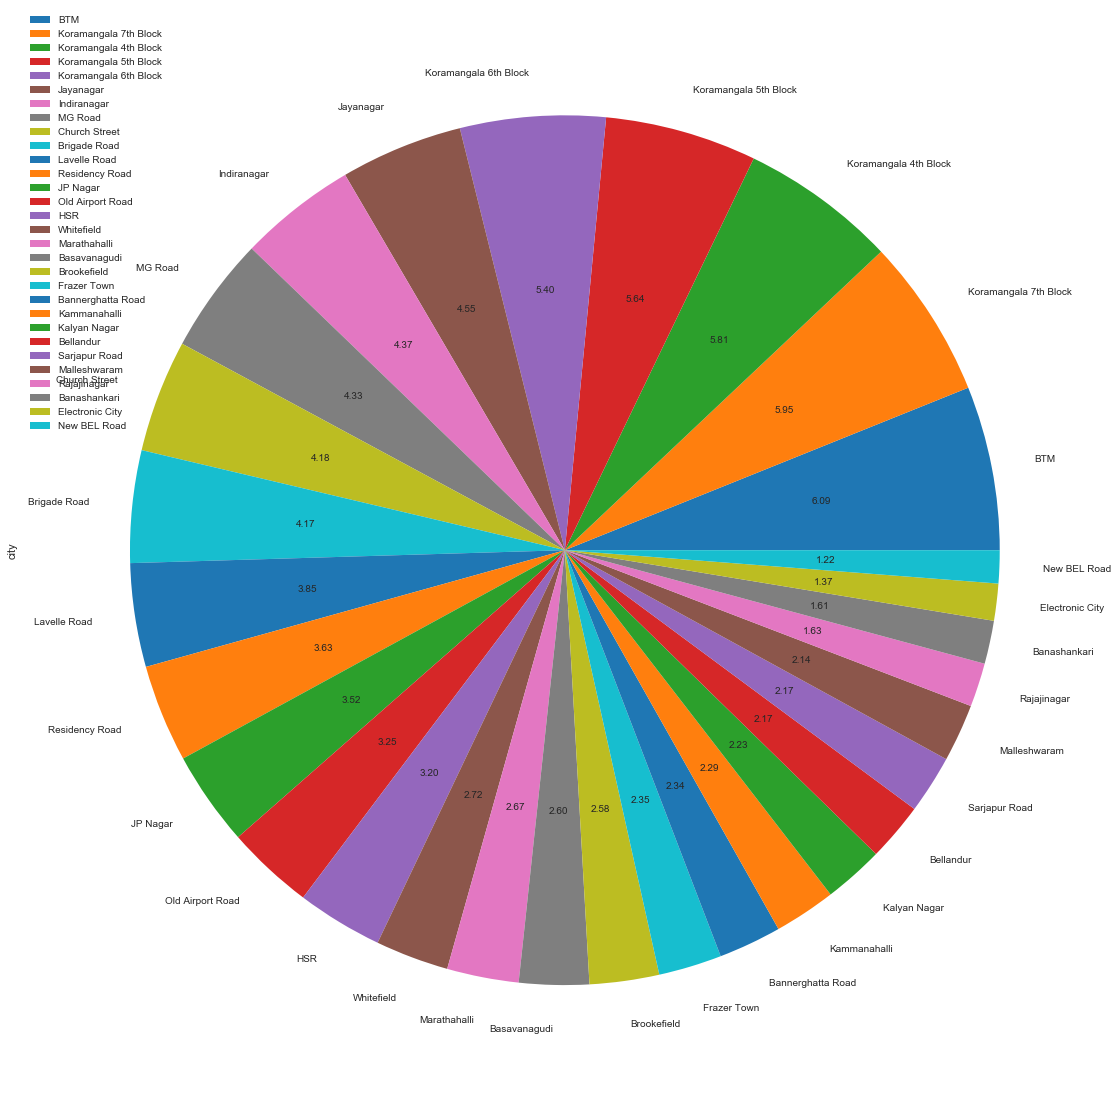

In [41]:
plt.figure(figsize=(20,20))
ax = df["city"].value_counts()

ax.plot(kind = "pie",fontsize = 10, autopct = "%.2f")
plt.legend()

##### Max. Number of Restaurants in  of banglore : Top 10

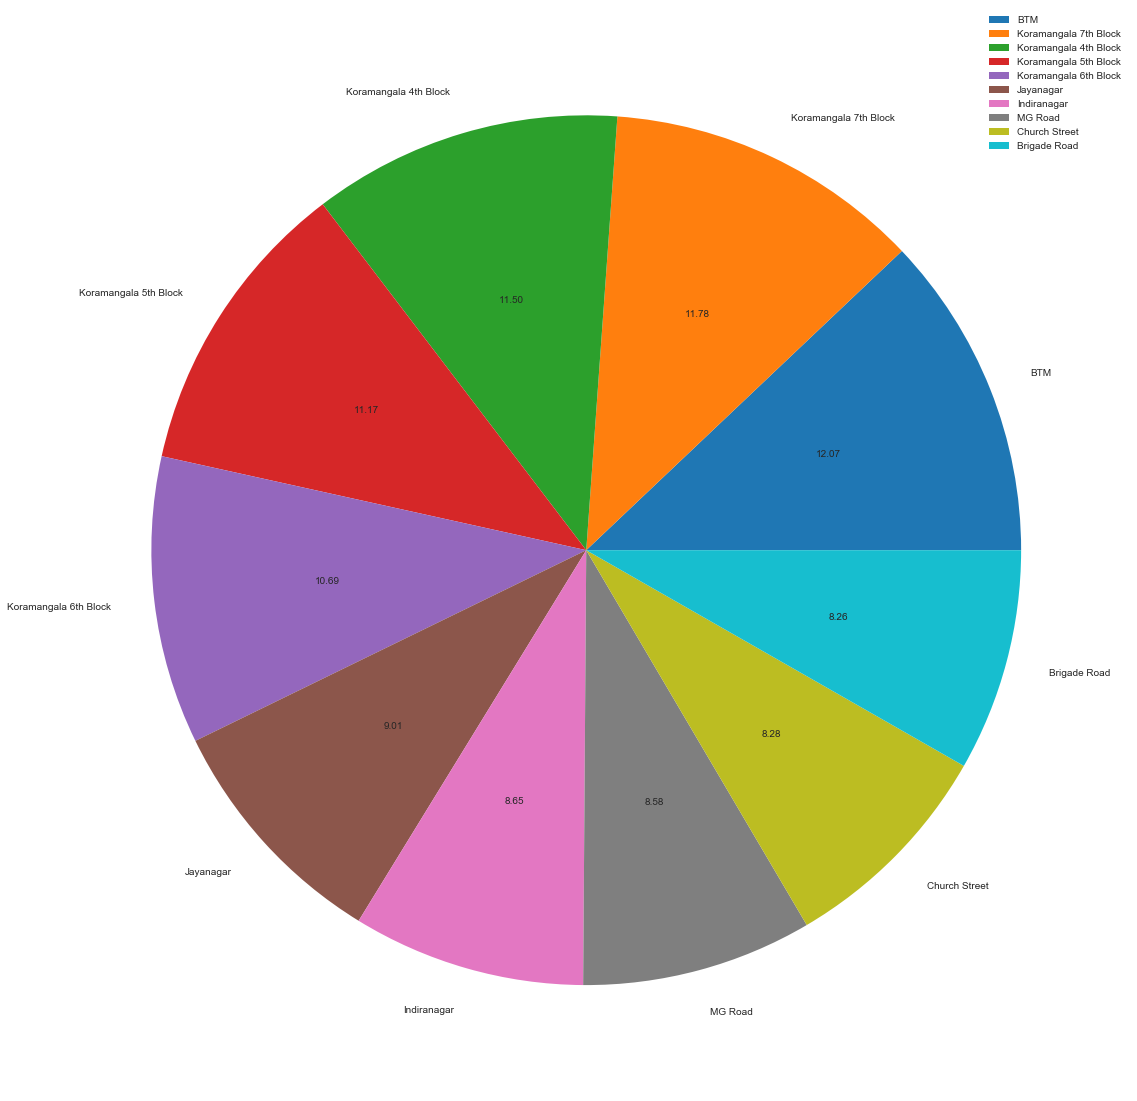

In [42]:
plt.figure(figsize=(20,20))
ax = df["city"].value_counts()[:10]
labels = df["city"].value_counts()[:10].index
plt.pie(ax, labels=labels,autopct = "%.2f")
plt.legend()
plt.show()

In this we observe that ---> In "BTM" location have most of restaurants

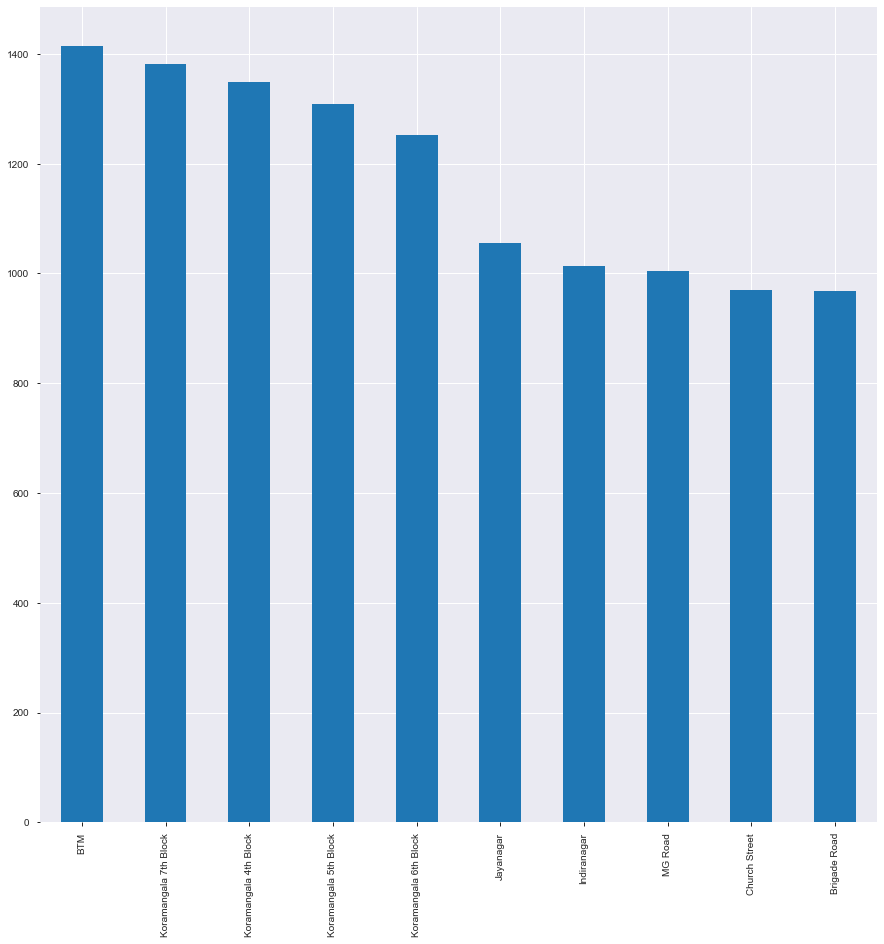

In [43]:
plt.figure(figsize=(15,15))
ax = df["city"].value_counts()[:10]
ax.plot(kind="bar")

####  Type of Restaurant in City

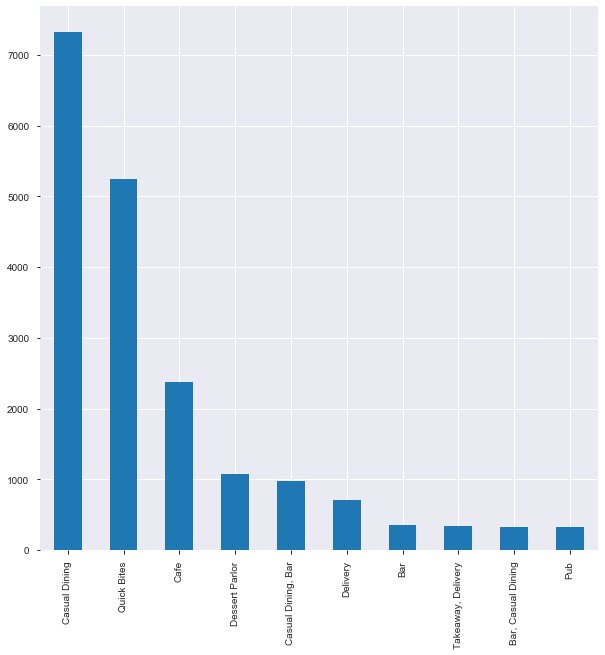

In [44]:
plt.figure(figsize=(10,10))
ax = df["rest_type"].value_counts()[:10]
ax.plot(kind="bar")


Restaurant that have same type more than 500 

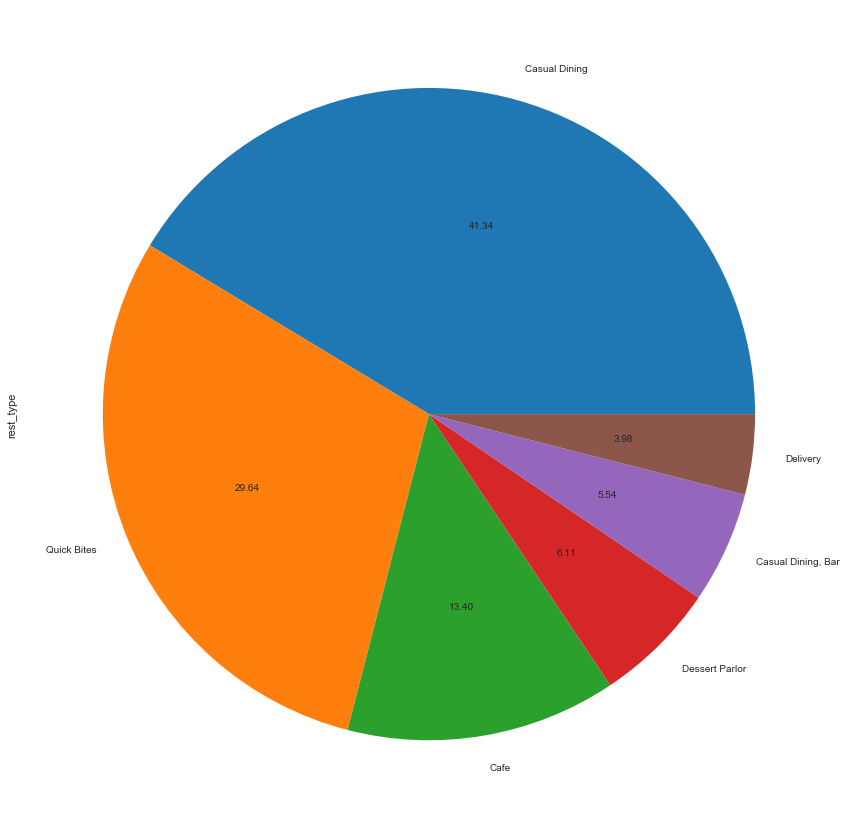

In [45]:
a=df["rest_type"].value_counts()
b=a[a>500]  
plt.figure(figsize=(15,15))
b.plot(kind="pie",autopct="%.2f")

In [46]:
a[a>500]

Casual Dining         7320
Quick Bites           5248
Cafe                  2372
Dessert Parlor        1081
Casual Dining, Bar     980
Delivery               704
Name: rest_type, dtype: int64

#### Avg Cost For Two Person ---> In case we observe what most of people prefer
In case data in "Object" type so convert data into the integer format and then we can perform the sort function so we can easy to find out .

In [47]:
df.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int32
rest_type       object
dish_liked      object
cuisines        object
cost            object
Meal_type       object
city            object
dtype: object

In [48]:
df['cost'] = df['cost'].apply(lambda x: str(x).replace(',',''))

/home/arcgate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
df["cost"]

0         800
1         800
2         800
3         300
4         600
         ... 
51705    1200
51707    2000
51708    1200
51711     800
51715    2500
Name: cost, Length: 23218, dtype: object

In [50]:
df["cost"] = df["cost"].astype("int32")

/home/arcgate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int32
rest_type       object
dish_liked      object
cuisines        object
cost             int32
Meal_type       object
city            object
dtype: object

In [52]:
s = df["cost"].sort_values()

In [53]:
a = df["cost"].value_counts()
a.sort_values(axis="index",ascending=False)

400     2477
500     2320
600     2167
300     1687
800     1646
1000    1217
700     1201
1200     901
200      869
1500     836
450      719
250      696
750      651
650      644
350      553
900      523
1300     494
1100     449
1400     445
550      439
150      370
2000     296
1600     235
1700     228
1800     193
3000     159
2500     142
850      122
100      120
2100      60
1900      57
950       47
2200      39
2800      31
3500      25
4000      24
2400      22
1350      18
180       17
3400      13
230       10
40         8
1250       8
1650       6
1450       5
4100       4
2600       4
1050       4
330        4
6000       2
120        2
4500       2
3200       2
2700       2
2300       1
5000       1
3700       1
Name: cost, dtype: int64

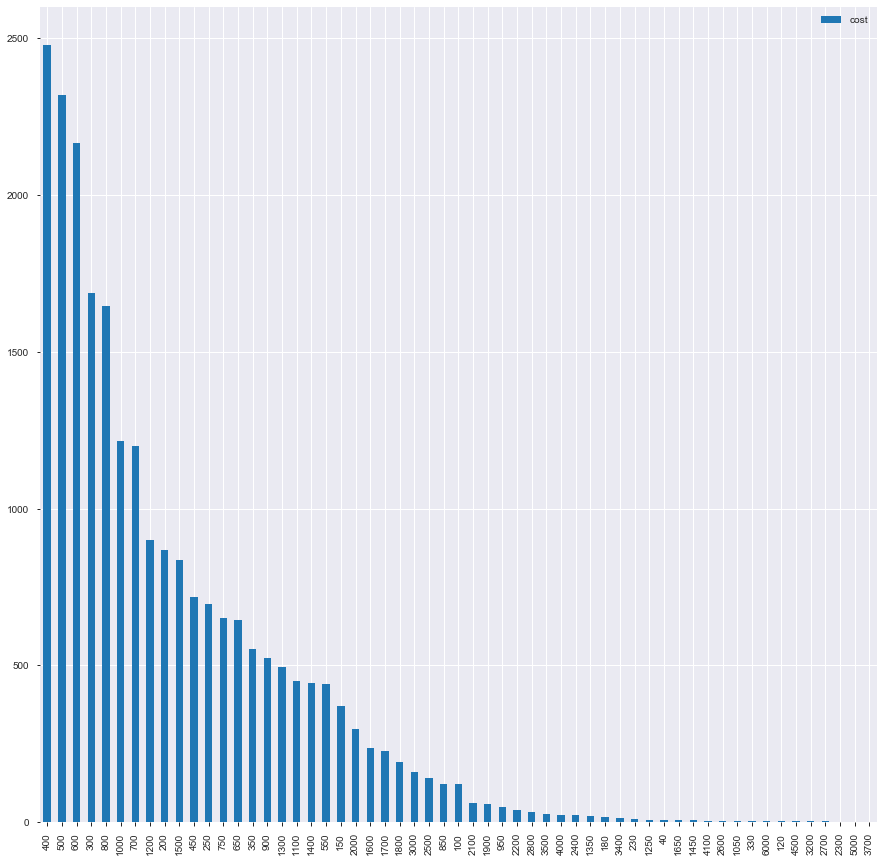

In [54]:
plt.figure(figsize=(15,15))
ax = a
ax.plot(kind="bar")
plt.legend()

### Rating Distribution

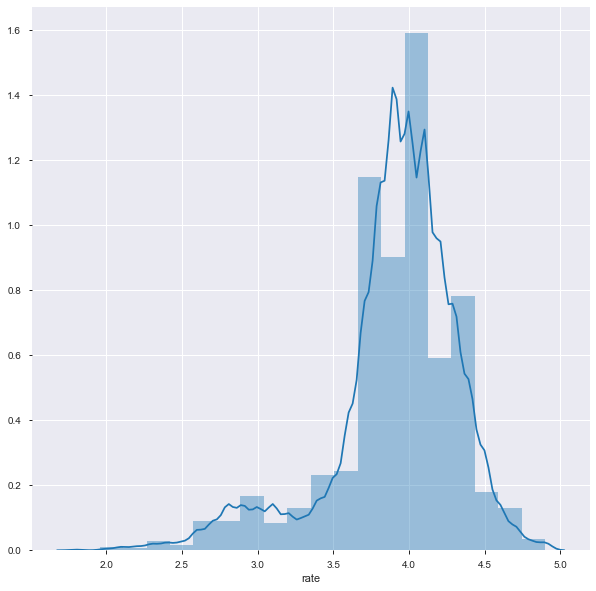

In [55]:
# How rating are distributed
plt.figure(figsize=(10,10))
sns.distplot(df["rate"],bins=20)

#### Observation:
Most of the ratings are within 3.5 and 4.5

#### Counting the rating as b/w "1 and 2","2 and 3","3 and 4",and "5"

In [56]:
df["rate"].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [57]:
print("The min Rating: ",df['rate'].min())
print("The max Rating: ",df["rate"].max())

The min Rating:  1.8
The max Rating:  4.9 


In [58]:
df.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int32
rest_type       object
dish_liked      object
cuisines        object
cost             int32
Meal_type       object
city            object
dtype: object

In [59]:
# in case rate in "object" types --> Change into "float" type
df["rate"] = df["rate"].astype("float")

/home/arcgate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int32
rest_type        object
dish_liked       object
cuisines         object
cost              int32
Meal_type        object
city             object
dtype: object

In [61]:
((df["rate"]>3) & (df["rate"]<4)).sum()    

9860

Plotting the Counts with the help of pie chart

In [62]:
slices = [((df["rate"]>=1) & (df["rate"]<2)).sum(),
         ((df["rate"]>=2) & (df["rate"]<3)).sum(),
         ((df["rate"]>=3) & (df["rate"]<4)).sum(),
         (df["rate"]>4).sum()
         ]
slices

[5, 1178, 10151, 8984]

Text(0.5, 1.0, 'Percentage of Restaurants acc. to their Rating')

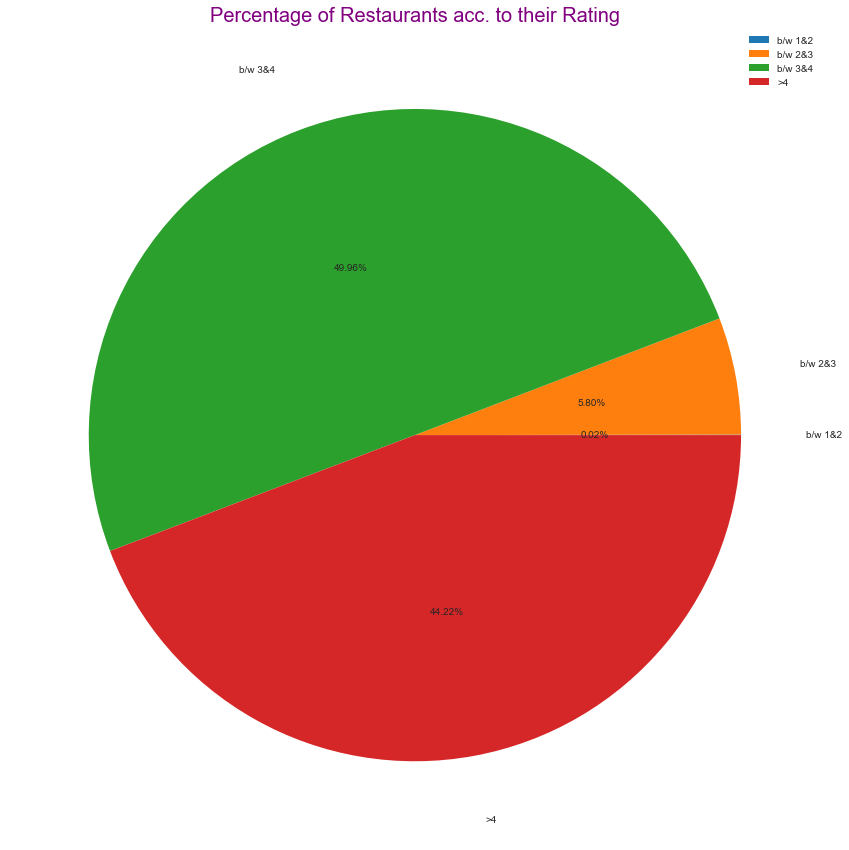

In [63]:
plt.figure(figsize=(15,15))
labels = ["b/w 1&2","b/w 2&3","b/w 3&4",">4"]
plt.pie(slices,labels=labels,autopct = "%0.2f%%",labeldistance=1.2,pctdistance=.55)
plt.legend()
plt.title("Percentage of Restaurants acc. to their Rating",fontsize = 20, color = "purple")

### Most Liked Dishes


In [64]:
df["dish_liked"]

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51705    Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...
51707                                     Rooftop Ambience
51708    Salads, Coffee, Breakfast Buffet, Halwa, Chick...
51711                                 Biryani, Andhra Meal
51715                         Cocktails, Pizza, Buttermilk
Name: dish_liked, Length: 23218, dtype: object

In [65]:
df.shape

(23218, 11)

#### idea
* In this case we Store all the [dish_liked] element in the "empty_list" and then we count no. of time it occurs,
* this show the popularity of the each_dish

In [66]:
# "re" ----> regular expression (use for the splitting words)

import re
df.shape

(23218, 11)

In [67]:
df.index = range(df.shape[0])
likes = []
for i in range(df.shape[0]):
    array_split = re.split(",",df['dish_liked'][i])
    for iteam in array_split:
        likes.append(iteam)

In [68]:
likes

['Pasta',
 ' Lunch Buffet',
 ' Masala Papad',
 ' Paneer Lajawab',
 ' Tomato Shorba',
 ' Dum Biryani',
 ' Sweet Corn Soup',
 'Momos',
 ' Lunch Buffet',
 ' Chocolate Nirvana',
 ' Thai Green Curry',
 ' Paneer Tikka',
 ' Dum Biryani',
 ' Chicken Biryani',
 'Churros',
 ' Cannelloni',
 ' Minestrone Soup',
 ' Hot Chocolate',
 ' Pink Sauce Pasta',
 ' Salsa',
 ' Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri',
 ' Gol Gappe',
 'Onion Rings',
 ' Pasta',
 ' Kadhai Paneer',
 ' Salads',
 ' Salad',
 ' Roti',
 ' Jeera Rice',
 'Farmhouse Pizza',
 ' Chocolate Banana',
 ' Virgin Mojito',
 ' Pasta',
 ' Paneer Tikka',
 ' Lime Soda',
 ' Prawn Pizza',
 'Pizza',
 ' Mocktails',
 ' Coffee',
 ' Nachos',
 ' Salad',
 ' Pasta',
 ' Sandwiches',
 'Waffles',
 ' Pasta',
 ' Coleslaw Sandwich',
 ' Choco Waffle',
 ' Tacos',
 ' Momos',
 ' Cheese Nachos',
 'Waffles',
 ' Pasta',
 ' Crispy Chicken',
 ' Honey Chilli Chicken',
 ' Sandwich',
 ' Coffee',
 ' Crepe',
 'Mocktails',
 ' Peri Fries',
 ' Lasagne',
 ' Pizza',
 ' Chicken 

In [69]:
# Now count the no. of occurance
print("Count of Most Liked dishes in Banglore")
favourite_items = pd.DataFrame(likes).value_counts()

Count of Most Liked dishes in Banglore


In [70]:
# Top 25 favourite food counts
favourite_items.head(25)

 Pasta              2685
 Pizza              1907
 Cocktails          1868
 Burgers            1732
 Mocktails          1613
 Biryani            1304
 Sandwiches         1286
Burgers             1254
 Coffee             1184
 Nachos             1166
 Fish               1115
 Paratha            1106
 Salads             1052
 Chicken Biryani    1004
Cocktails            887
 Fries               875
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 817
Coffee               801
 Sandwich            787
 Butter Chicken      782
 Thali               770
Biryani              748
dtype: int64

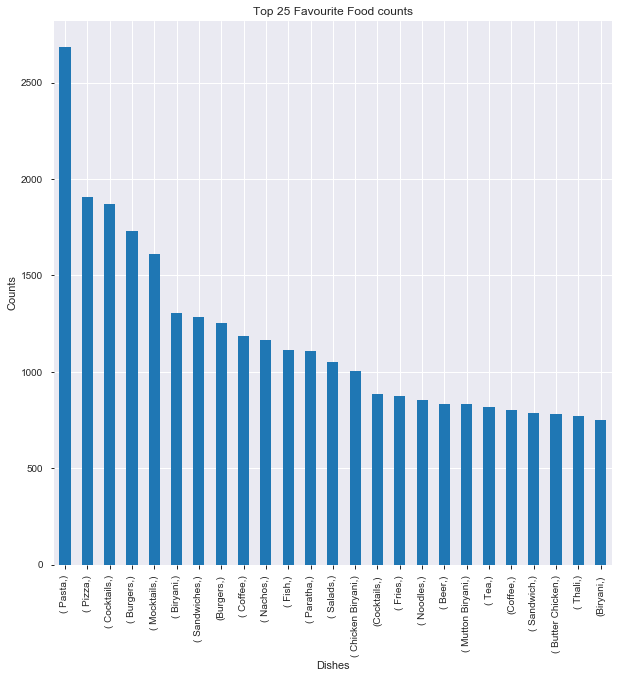

In [71]:
plt.figure(figsize=(10,10))
ax = favourite_items.nlargest(n=25,keep = "first")
ax.plot(kind="bar",title ="Top 25 Favourite Food counts", xlabel = "Dishes",ylabel = "Counts")



We can infer from that analysis that the 5 most liked dishes are 
##### Pasta, Pizza, Cocktails, Burgers, Mocktails

# Building Our Model
Build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features

In [72]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,Meal_type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


## Data Preprocessing
#### Data Transformation
* let's Convert categorical data into Numerical data using ---"LabelEncoding"

In [73]:
# Now we drop Unwanted Columns
df = df.drop(['dish_liked','Meal_type'],axis = 1)

In [74]:
df = df.drop(['name'],axis=1)

#### Label Encoder

In [75]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [76]:
df.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type', 'cuisines',
       'cost', 'city'],
      dtype='object')

In [77]:
l1 = ['online_order','book_table','rest_type','cuisines','city']
for i in l1:
    df[i] = le.fit_transform(df[i])

In [78]:
df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,cost,city
0,1,1,4.1,775,20,1386,800,1
1,1,0,4.1,787,20,594,800,1
2,1,0,3.8,918,16,484,800,1
3,0,0,3.7,88,62,1587,300,1
4,0,0,3.8,166,20,1406,600,1


As we see that data in label encoder

## Data Transformation
#### Feature and label selection from data

In [79]:
df.shape

(23218, 8)

In [80]:
# drop null values
df.dropna(how= "any",inplace= True)
df.shape

(23218, 8)

In [81]:
# selection of the feature col
features = df.drop(["rate"],axis=1)
df.shape

(23218, 8)

In [82]:
features.dtypes   # now all data is convert into categorical -->integer

online_order    int64
book_table      int64
votes           int32
rest_type       int64
cuisines        int64
cost            int32
city            int64
dtype: object

In [83]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [84]:
# Selection of the label col 
label = df['rate'].values
label

array([4.1, 4.1, 3.8, ..., 2.8, 2.5, 4.3])

In case data are vary far from each other so we can apply the "StandardScaling"

### Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [86]:
features = StandardScaler().fit(features).transform(features)
features

array([[ 0.64765226,  1.68699436,  0.15341614, ...,  1.10625334,
         0.09049271, -1.63320021],
       [ 0.64765226, -0.59277021,  0.16420077, ..., -0.56601114,
         0.09049271, -1.63320021],
       [ 0.64765226, -0.59277021,  0.28193301, ..., -0.7982701 ,
         0.09049271, -1.63320021],
       ...,
       [-1.54403847, -0.59277021, -0.39839757, ..., -0.68214062,
         0.85950607,  1.79700039],
       [-1.54403847, -0.59277021, -0.47029512, ..., -1.6512939 ,
         0.09049271,  1.79700039],
       [-1.54403847,  1.68699436, -0.33099361, ...,  0.03363925,
         3.35879947,  1.79700039]])

### Spli the data
*we splited the data into train and test set -- training(90%) and testing (10%) 

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(features,label, test_size = 0.10, random_state = 35 )

In [88]:
#  check the shape of splitted data
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((20896, 7), (2322, 7), (20896,), (2322,))

### Apply Regression Model
#### 1) Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

* Train the model on train set

In [90]:
lin_reg.fit(x_train,y_train)

LinearRegression()

* Checking the model score on train and test set

In [91]:
print(lin_reg.score(x_train,y_train))

0.22255475780354128


In [92]:
print(lin_reg.score(x_test,y_test))

0.21590045880901287


it's good thing that both "train and test"  score is almost near to each other

#### New Predict

In [93]:
lin_reg_pred = lin_reg.predict(x_test)

In [94]:
from sklearn.metrics import r2_score
lin_reg_score = r2_score(y_test,lin_reg_pred)*100
print("Accuracy score for LR :",lin_reg_score)

Accuracy score for LR : 21.590045880901286


#### 2) Ridge Regression

In [139]:
from sklearn.linear_model import Ridge

In [140]:
rr = Ridge()
rr

Ridge()

In [141]:
rr.fit(x_train, y_train)

Ridge()

In [142]:
print(rr.score(x_train,y_train))
print(rr.score(x_test,y_test))

0.2225547575636596
0.21590031490006523


In [143]:
rr_pred = rr.predict(x_test)

In [144]:
from sklearn.metrics import r2_score
rr_score = r2_score(y_test, rr_pred) * 100
print("Accuracy score for RidgeR : ", rr_score)

Accuracy score for RidgeR :  Ridge()


In [145]:
# change the dimension of the x_test --> [ x_Test -> rr_pred ]
print("shape")
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)
print("rr_pred:",rr_pred.shape)

shape
x_test:  (2322, 7)
y_test:  (2322,)
rr_pred: (2322,)


#### 3) Lasso 

In [102]:
from sklearn.linear_model import Lasso

In [103]:
lr = Lasso()
lr

Lasso()

In [104]:
lr.fit(x_train,y_train)

Lasso()

In [105]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.0
-0.0013036158684518462


In [106]:
lr_pred = lr.predict(x_test)

In [107]:
from sklearn.metrics import r2_score
lr_score = r2_score(y_test , lr_pred)
print("Accuracy score for Lasso : ", lr_score)

Accuracy score for Lasso :  -0.0013036158684518462


#### Note: 
*In practice, R2 will be negative whenever our model's predictions are worse than a constant function that always predicts the mean of the data.

In [117]:
from sklearn.ensemble import RandomForestRegressor

### 4. Random Forest Regression

In [118]:
rfr = RandomForestRegressor()
rfr

RandomForestRegressor()

In [119]:
rfr.fit(x_train , y_train)

RandomForestRegressor()

In [120]:
print(rfr.score(x_train,y_train))
print(rfr.score(x_test,y_test))

0.987767107221081
0.912801952368894


In [121]:
rfr_pred = rfr.predict(x_test)

In [122]:
from sklearn.metrics import r2_score
rfr_score = r2_score(y_test, rfr_pred)*100
print("Accuracy score for the Random Forest Regressor model: ",rfr_score)

Accuracy score for the Random Forest Regressor model:  91.28019523688941


* This Model for the Random Forest with parameter passing

In [123]:
RF_model = RandomForestRegressor(n_estimators=650,random_state=245, min_samples_leaf=0.0001)
RF_model

RandomForestRegressor(min_samples_leaf=0.0001, n_estimators=650,
                      random_state=245)

In [124]:
RF_model.fit(x_train,y_train)
x_pred = RF_model.predict(x_test)

In [125]:
print(y_test)
print(x_pred)

[3.6 3.9 3.9 ... 4.2 3.9 3. ]
[3.39430277 3.90559055 3.74464732 ... 4.20163481 3.77817269 3.12959528]


In [126]:
#y_test.dtype
x_pred.dtype
print(x_pred.shape)
print(y_test.shape)

(2322,)
(2322,)


In [127]:
x_pred = np.array(np.round(x_pred,1))
#x_pred
# y_test
r2 = r2_score(y_test,x_pred)


In [128]:
r2

0.8628912164377289

####  SVR -- (Support Vector Regression)

In [129]:
from sklearn.svm import SVR

In [130]:
svr = SVR()
svr

SVR()

In [131]:
svr.fit(x_test,y_test)

SVR()

In [132]:
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))

0.2966930008878177
0.3455365939558174


In [133]:
svr_pred = svr.predict(x_test)

In [134]:
from sklearn.metrics import r2_score
svr_score = r2_score(y_test,svr_pred) * 100
print("Accuracy score for the SVR : ",svr_score)

Accuracy score for the LR :  34.55365939558174


In [147]:
pd.DataFrame({"Model_Name" :['Linear Regression',"Ridge Reg", "Lasso Reg"," RandomForest Reg","Support Vector Regression"], "Accuracy Score ":[lin_reg_score, rr_score , lr_score,rfr_score,svr_score ]})

,Model_Name,Accuracy Score
0,Linear Regression,21.590046
1,Ridge Reg,21.590031
2,Lasso Reg,-0.001304
3,RandomForest Reg,91.280195
4,Support Vector Regression,34.553659


#### Note :-
* " RandomForest Regressor" give Highest Accuracy Score

##### Predict the Rating with Random Forest Regressor Model

In [136]:
rfr.predict([[0,0,88,62,1587,300,1]])

array([4.218])

* Compare Actual rating with Random Forest Regressor new prediciton Rating

In [137]:
pd.DataFrame({"Actual Rating": y_test, "Prediction Rating":np.round(rfr_pred,2)})

,Actual Rating,Prediction Rating
0,3.6,3.51
1,3.9,3.90
2,3.9,3.85
3,4.2,4.20
4,3.1,3.23
...,...,...
2317,4.1,3.98
2318,4.2,3.81
2319,4.2,4.20
2320,3.9,3.84


In [184]:
# use pickle to save our model so that we can use it later
import pickle
# saving model to disk
pickle.dump(rfr, open("zomato_best.pkl","wb"))
model = pickle.load(open("zomato_best.pkl","rb"))

In [183]:
df.to_csv("Zomato_ratingPrediction.csv",index = False)